In [1]:
from jax import grad, jit, vmap
import jax.numpy as jnp
from numpy import random
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
model = lambda x: x * 2.0 + 1.0
x_train = jnp.array([0, 1])
y_train = model(x_train)
x_test = jnp.array([2,3,4])
y_test = model(x_test)

## Function Definitinos

In [3]:
def get_fn():
    pred = lambda w, b, x: w * x + b
    f = lambda w, b, x, y: jnp.mean(jnp.power(y - pred(w,b,x),2))
    dfdwb = grad(f, argnums=[0,1])
    vdfdwb = vmap(dfdwb, (None, None, 0, 0))
    vf = vmap(f, (None, None, 0, 0))
    return vdfdwb, vf
vdfdwb, vf = get_fn()

In [4]:
def update(w, b, x_a, y_a, mu = 0.01):
    dw_a, db_a = vdfdwb(w, b, x_a, y_a)
    dw, db = jnp.mean(dw_a), jnp.mean(db_a)
    w -= mu * dw
    b -= mu * db
    return w, b    
update_jit = jit(update)

verify = lambda w, b, x_v, y_v: jnp.sum(vf(w, b, x_v, y_v))
verify_jit = jit(verify)

In [5]:
def train(w, b, x_a, y_a, x_v, y_v, N_epoch=1000, 
          update=update_jit, verify=verify_jit):
    J_list = []
    for epoch in range(N_epoch):
        w, b = update(w, b, x_a, y_a)
        J = verify(w, b, x_v, y_v)
        J_list.append(J)
    return w, b, J_list

In [6]:
w = random.uniform(low=-0.01, high=0.01, size=(1,))
b = random.uniform(low=-0.01, high=0.01, size=(1,))

In [7]:
N_epoch = 1000
w, b, J_list = train(w, b, x_train, y_train, x_test, y_test, 
                     N_epoch=N_epoch, update=update_jit, verify=verify_jit) 
print(f"w={w[0]:.2}, b={b[0]:.2}")

w=2.0, b=1.0


Text(0, 0.5, 'J')

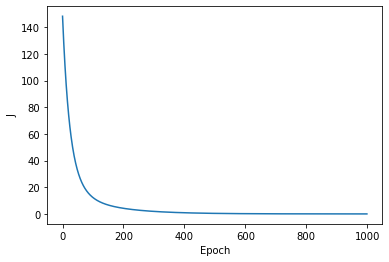

In [8]:
plt.plot(J_list)
plt.xlabel("Epoch")
plt.ylabel("J")

In [9]:
%time w, b, J_list = train(w, b, x_train, y_train, x_test, y_test, N_epoch = 1000, update=update, verify=verify) 
%time w, b, J_list = train(w, b, x_train, y_train, x_test, y_test, N_epoch = 1000, update=update_jit, verify=verify_jit) 

CPU times: user 12.6 s, sys: 0 ns, total: 12.6 s
Wall time: 20.8 s
CPU times: user 18.6 ms, sys: 0 ns, total: 18.6 ms
Wall time: 30.9 ms


In [10]:
6850/11.1

617.1171171171171